# 이미지 파일

래스터 그래픽(raster graphic) 이미지 또는 비트맵(bitmap) 이미지는 행렬 자료구조를 가진다.
행렬의 원소는 픽셀을 나타내며, 한 픽셀의 색상은 하나 이상의 비트를 사용하여 나타낸다.
래스터 이미지(raster image)는 압축 형식(compressed format)나 비압축 형식(uncompressed format) 또는 벡터 형식(vector format) 등 여러 가지 방식으로 저장할 수 있다.

## 이미지 파일 형식

잘 알려진 이미지 파일 형식은 다음과 같다.

1. JPEG (Joint Photographic Experts Group): 손실이 있는 압축 형식으로 JFIF (JPEG File Interchange Format) 파일 형식으로 저장된다. 확장자는 `.jpg` 또는 `.jpeg`이다.
2. GIF (Graphics Interchange Format):  손실이 없는 LZW 압축을 사용하는 이미지 파일 형식으로 색상의 수가 작은 만화 등에 적합하다. 확장자는 `.gif`이다. 256 색상을 지원한다.
3. BMP (BitMap): 손실이 없는 비압축 이미지 파일 형식이다.
4. PNG (Portable Network Graphics): GIF에 대응한 공개 소프트웨어 진영의 이미지 파일 형식이다. 256 색상을 지원하는 GIF와 달리 24-bit truecolor (16 million colors)나 48-bit truecolor를 지원한다.

## 이미지 파일 처리하기

In [1]:
%matplotlib inline

이미지 파일 처리를 지원하는 기본적인 모듈은 `pillow` 패키지의 `Image` 모듈이다.

In [2]:
from PIL import Image

In [3]:
charles = Image.open('./images/Charles_Darwin_1.jpg')
type(charles)

PIL.JpegImagePlugin.JpegImageFile

Jupyter notebbok에 이미지를 나타내려면 다음과 같이 `matplotlib.pyplot.imshow()` 함수를 사용한다.
이미지 객체의 `show()` 메소드는 그림판과 같은 외부 프로그램을 이용해서 이미지를 보여준다.

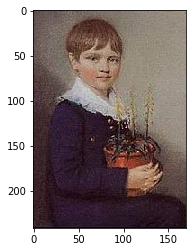

In [4]:
import matplotlib.pyplot as plt
plt.imshow(charles)             # charles.show()

이미지의 크기는 다음과 같이 `size` 속성으로 알아본다.

In [5]:
charles.size

(170, 242)

이미지의 크기를 줄일 수 있다.

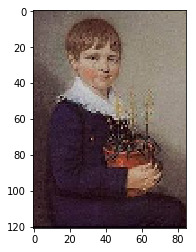

In [6]:
resized_charles = charles.resize((int(170*0.5), int(242*0.5)))
plt.imshow(resized_charles)

이미지를 회전시킬 때는 `rotate()` 메소드를 사용한다.
회전하더라도 가로와 세로의 픽셀 수가 달라지진 않는다.
따라서 잘려서 버려지는 부분이 생기거나 추가되는 부분이 생길 수 있다.

(170, 242)
<class 'PIL.Image.Image'>


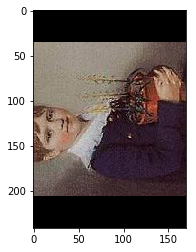

In [7]:
rotated_charles = charles.rotate(90)
print(rotated_charles.size)
print(type(rotated_charles))
plt.imshow(rotated_charles)

이미지에 텍스트를 추가할 경우에는 다음과 같이 한다.

1. 텍스트 출력에 사용할 폰트와 크기 그리고 인코딩을 지정하여 폰트 객체를 생성한다.
2. 이미지 객체에 텍스나 그림을 그릴 `Draw` 객체를 생성한다.
3. `Draw` 객체의 `text()` 메소드로 이미지에 텍스트를 추가한다.

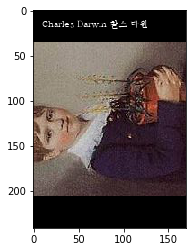

In [8]:
from PIL import ImageDraw, ImageFont
font = ImageFont.truetype(r'C:\Windows\Fonts\batang.ttc', size=10, encoding='unic')
draw = ImageDraw.Draw(rotated_charles)
txt = u'Charles Darwin 찰스 다윈'  # 문자열을 unicode로 설정한다.
draw.text((10, 10), txt, font=font)
plt.imshow(rotated_charles)

변경된 이미지를 저장할 때는 `save()` 메소드를 사용한다.
저장할 때 저장형식을 지정할 수 있다.

In [9]:
rotated_charles.save('./images/rotated_Charles_Darwin.png', format='PNG')

픽셀 단위로 작업할 경우에는 이미지를 `numpy` 배열로 변환하는 것이 좋다.
기계학습이나 심층학습 등에서 이미지를 다룰 때 기본적으로 `numpy` 배열을 사용한다.
`PIL Image` 객체의 픽셀 값 배열은 `numpy.array()` 함수를 이용하여 얻을 수 있다.

In [10]:
import numpy as np

modified_charles = np.zeros(rotated_charles.size)
modified_charles = np.array(rotated_charles)
print(type(modified_charles))
print(modified_charles.shape)
modified_charles[50:53, 60:64, :]

<class 'numpy.ndarray'>
(242, 170, 3)


array([[[158, 148, 138],
        [159, 149, 139],
        [160, 150, 140],
        [155, 145, 135]],

       [[159, 149, 139],
        [159, 149, 139],
        [160, 150, 140],
        [159, 149, 139]],

       [[164, 154, 144],
        [156, 146, 136],
        [156, 146, 136],
        [160, 150, 140]]], dtype=uint8)

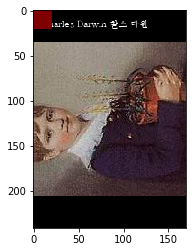

In [11]:
for row in range(modified_charles.shape[0]):
    for col in range(modified_charles.shape[1]):
        if row <= 20 and col <= 20:
           modified_charles[row, col] = [127, 0, 0]
plt.imshow(modified_charles)

`numpy` 배열을 `PIL Image` 객체로 변환할 때는 다음과 같이 `fromarray()` 함수를 사용한다.

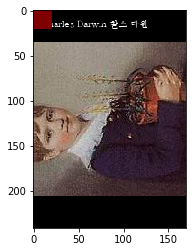

In [12]:
mcd = Image.fromarray(modified_charles)
mcd.save('./images/modified_charles_darwin.jpg', format='JPEG')
plt.imshow(mcd)

## 연습문제

1. `./images` 디렉토리에 있는 이미지 파일의 이름을 구해보시오.
2. `./images/Gauss_Normal_Dist_in_Deutch_Mark.jpg` 이미지를 출력해보시오.
2. `./images/python-logo.png`을 복사하여 `./images/python-logo-copy.jpg`로 저장하시오.
3. `PIL` 패키지의 `ImageDarw` 클래스의 메소드에 대해서 알아보고 이 메소드를 이용해서 `./images/python-logo-copy.jpg`에 여러 가지 편집 작업을 해보시오.
    * 직선을 그려보시오.
    * 텍스트를 출력해보시오.
    *  `./images/python-logo-copy.jpg` 이미지와 같은 크기의 난수 행렬을 만들어서 이미지에 더하시오.
    픽셀의 값이 0과 255 사이에 오도록 정규화한 이미지를 저장하고 화면에 나타내보시오.